## ***Data Analystics***

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**Upload xlsx File. Renamed as DataAnalytics.xlsx**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataAnalytics.xlsx to DataAnalytics (7).xlsx


In [ ]:
# data.xlsx is only the second sheet of xl file
#df = pd.read_excel ('data.xlsx')
#print (df)

In [ ]:
#df.info()

In [ ]:
#dh = df.describe().loc['count'].to_frame()

In [ ]:
#dh.head()

In [ ]:
# Q1. Daily Active Users varied across time
#import matplotlib.pyplot as plt
#plt.xticks(rotation=90, fontsize = 'small')
#plt.plot(dh)
#plt.show()

In [ ]:
xl = pd.ExcelFile('DataAnalytics.xlsx')

In [ ]:
print(xl.sheet_names)

['MIS', 'Dump - User IDs']


In [ ]:
df1 = xl.parse('Dump - User IDs')

**Data from xlsx File**

In [ ]:
df1.head()

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
0,2154.0,3539.0,2.0,2.0,4466.0,4426.0,4345.0,4345.0,2.0,4200.0,...,538.0,628.0,3.0,6247.0,2.0,630.0,2.0,1524.0,3.0,3
1,6286.0,4522.0,4508.0,223.0,4467.0,4427.0,4386.0,2.0,4146.0,3902.0,...,539.0,629.0,817.0,364.0,3.0,364.0,630.0,1525.0,1524.0,817
2,NaN,4511.0,3539.0,4430.0,4468.0,4271.0,4271.0,4346.0,4271.0,4146.0,...,540.0,630.0,6247.0,6.0,6247.0,222.0,1388.0,364.0,817.0,6247
3,NaN,4523.0,4509.0,4431.0,4469.0,4428.0,4387.0,4347.0,4272.0,4201.0,...,541.0,631.0,632.0,365.0,364.0,633.0,1389.0,541.0,6247.0,6274
4,NaN,4503.0,4510.0,2165.0,4470.0,223.0,4348.0,4271.0,4273.0,4202.0,...,221.0,632.0,364.0,7.0,6.0,11.0,1103.0,437.0,6274.0,6


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 91 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2020-01-01 00:00:00  2 non-null      float64
 1   2020-01-02 00:00:00  29 non-null     float64
 2   2020-01-03 00:00:00  42 non-null     float64
 3   2020-01-04 00:00:00  27 non-null     float64
 4   2020-01-05 00:00:00  91 non-null     float64
 5   2020-01-06 00:00:00  115 non-null    float64
 6   2020-01-07 00:00:00  129 non-null    float64
 7   2020-01-08 00:00:00  132 non-null    float64
 8   2020-01-09 00:00:00  163 non-null    float64
 9   2020-01-10 00:00:00  164 non-null    float64
 10  2020-01-11 00:00:00  144 non-null    float64
 11  2020-01-12 00:00:00  79 non-null     float64
 12  2020-01-13 00:00:00  54 non-null     float64
 13  2020-01-14 00:00:00  47 non-null     float64
 14  2020-01-15 00:00:00  50 non-null     float64
 15  2020-01-16 00:00:00  55 non-null     flo

In [ ]:
df1.describe()

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
count,2.00000,29.000000,42.000000,27.000000,91.000000,115.000000,129.000000,132.000000,163.000000,164.000000,...,239.000000,332.000000,343.000000,334.000000,333.000000,302.000000,323.000000,327.000000,348.000000,407.000000
mean,4220.00000,4007.758621,3739.047619,2980.148148,3686.219780,3840.834783,3750.403101,3511.090909,3754.147239,3738.115854,...,730.242678,786.822289,830.373178,940.485030,1079.300300,1112.046358,1136.904025,1321.773700,1428.500000,1428.282555
std,2921.76522,979.096437,1322.529929,1772.930488,1442.856017,1258.126119,1245.531704,1435.573755,1290.329196,1107.874732,...,1397.365649,1178.976665,1080.200686,1083.042815,1075.195331,949.427069,745.047162,1051.021366,1031.340041,1088.997293
min,2154.00000,153.000000,2.000000,2.000000,110.000000,35.000000,153.000000,2.000000,2.000000,47.000000,...,6.000000,6.000000,3.000000,6.000000,2.000000,11.000000,2.000000,18.000000,3.000000,3.000000
25%,3187.00000,3977.000000,3452.750000,1969.500000,3766.500000,3952.000000,3921.000000,3479.250000,3946.000000,3925.500000,...,214.500000,389.500000,400.500000,495.500000,637.000000,725.750000,728.000000,803.000000,916.000000,766.500000
50%,4220.00000,4515.000000,4446.000000,3450.000000,4405.000000,4359.000000,4131.000000,4140.000000,4238.000000,4157.500000,...,468.000000,664.500000,794.000000,888.000000,1107.000000,1178.000000,1323.000000,1407.000000,1576.500000,1508.000000
75%,5253.00000,4527.000000,4511.750000,4446.000000,4480.500000,4439.500000,4396.000000,4354.250000,4307.500000,4231.250000,...,581.500000,747.250000,888.500000,1029.750000,1190.000000,1319.750000,1446.500000,1573.500000,1706.250000,1802.500000
max,6286.00000,4534.000000,6287.000000,6287.000000,6287.000000,6296.000000,6302.000000,6287.000000,6302.000000,6290.000000,...,6295.000000,6312.000000,6313.000000,6312.000000,6312.000000,6308.000000,6289.000000,6313.000000,6308.000000,6312.000000


# **Q1.Daily Active Users varied across time**

In [ ]:
dh1 = df1.describe().loc['count'].to_frame()

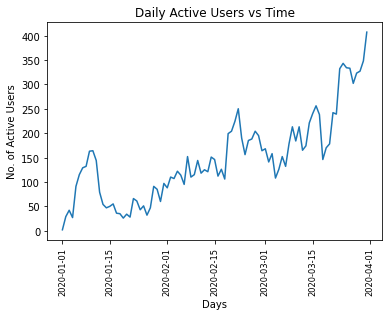

In [ ]:
# Q1. Daily Active Users varied across time
import matplotlib.pyplot as plt
plt.xticks(rotation=90, fontsize = 'small')
plt.title('Daily Active Users vs Time')
plt.xlabel('Days')
plt.ylabel('No. of Active Users')
plt.plot(dh1)
plt.show()

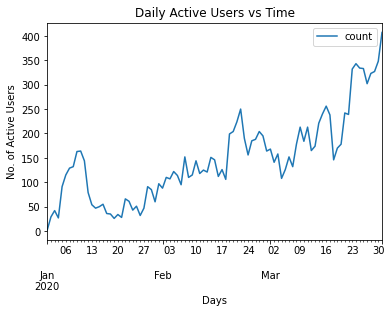

In [ ]:
dh1.plot()
plt.title('Daily Active Users vs Time')
plt.xlabel('Days')
plt.ylabel('No. of Active Users')
plt.show()

In [ ]:
df2 = df1.transpose()

In [ ]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,397,398,399,400,401,402,403,404,405,406
2020-01-01,2154.0,6286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,3539.0,4522.0,4511.0,4523.0,4503.0,4504.0,4524.0,3450.0,4525.0,4073.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,2.0,4508.0,3539.0,4509.0,4510.0,4431.0,3998.0,4511.0,309.0,2165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,2.0,223.0,4430.0,4431.0,2165.0,4503.0,4504.0,3054.0,3450.0,251.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,4466.0,4467.0,4468.0,4469.0,4470.0,223.0,4471.0,4472.0,4473.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3 = df1.melt(var_name='dates', value_name='Ids')
df3.head()

,dates,Ids
0,2020-01-01,2154.0
1,2020-01-01,6286.0
2,2020-01-01,NaN
3,2020-01-01,NaN
4,2020-01-01,NaN


In [ ]:
df3 = df3.dropna()

In [ ]:
df8 = df3.assign(Occurence=np.where(~df3['Ids'].duplicated(),'New','Existing'))

**New and Existing Users**

In [ ]:
df8

,dates,Ids,Occurence
0,2020-01-01,2154.0,New
1,2020-01-01,6286.0,New
407,2020-01-02,3539.0,New
408,2020-01-02,4522.0,New
409,2020-01-02,4511.0,New
...,...,...,...
37032,2020-03-31,1386.0,Existing
37033,2020-03-31,1643.0,Existing
37034,2020-03-31,1889.0,New
37035,2020-03-31,1782.0,Existing


In [ ]:
df9 = df8.pivot('Ids', 'dates')

In [ ]:
df9

Occurence                                                         \
dates  2020-01-01 2020-01-02 2020-01-03 2020-01-04 2020-01-05 2020-01-06   
Ids                                                                        
1.0           NaN        NaN        NaN        NaN        NaN        NaN   
2.0           NaN        NaN        New   Existing        NaN        NaN   
3.0           NaN        NaN        NaN        NaN        NaN        NaN   
4.0           NaN        NaN        NaN        NaN        NaN        NaN   
5.0           NaN        NaN        NaN        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
6307.0        NaN        NaN        NaN        NaN        NaN        NaN   
6308.0        NaN        NaN        NaN        NaN        NaN        NaN   
6309.0        NaN        NaN        NaN        NaN        NaN        NaN   
6312.0        NaN        NaN        NaN        NaN        NaN        NaN   
6313.0        NaN        NaN        NaN        NaN        NaN        NaN   

                                                    ...                        \
dates  2020-01-07 2020-01-08 2020-01-09 2020-01-10  ... 2020-03-22 2020-03-23   
Ids                                                 ...                         
1.0           NaN        NaN        NaN        NaN  ...        NaN        NaN   
2.0           NaN   Existing   Existing        NaN  ...        NaN        NaN   
3.0           NaN        NaN        NaN        NaN  ...        NaN        NaN   
4.0           NaN        NaN        NaN        NaN  ...        NaN        NaN   
5.0           NaN        NaN        NaN        NaN  ...        NaN        NaN   
...           ...        ...        ...        ...  ...        ...        ...   
6307.0        NaN        NaN        NaN        NaN  ...        NaN        NaN   
6308.0        NaN        NaN        NaN        NaN  ...        NaN        NaN   
6309.0        NaN        NaN        NaN        NaN  ...        NaN        NaN   
6312.0        NaN        NaN        NaN        NaN  ...        NaN   Existing   
6313.0        NaN        NaN        NaN        NaN  ...        NaN        NaN   

                                                                          \
dates  2020-03-24 2020-03-25 2020-03-26 2020-03-27 2020-03-28 2020-03-29   
Ids                                                                        
1.0           NaN        NaN        NaN        NaN        NaN        NaN   
2.0           NaN        NaN   Existing        NaN   Existing        NaN   
3.0      Existing        NaN   Existing        NaN        NaN        NaN   
4.0           NaN        NaN        NaN        NaN        NaN        NaN   
5.0           NaN        NaN        NaN        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
6307.0        NaN        NaN        NaN        NaN        NaN        NaN   
6308.0        NaN   Existing   Existing   Existing        NaN   Existing   
6309.0        NaN        NaN        NaN        NaN        NaN        NaN   
6312.0   Existing   Existing   Existing        NaN        NaN        NaN   
6313.0   Existing        NaN        NaN        NaN        NaN   Existing   

                              
dates  2020-03-30 2020-03-31  
Ids                           
1.0           NaN        NaN  
2.0           NaN        NaN  
3.0      Existing   Existing  
4.0           NaN        NaN  
5.0           NaN        NaN  
...           ...        ...  
6307.0        NaN        NaN  
6308.0   Existing   Existing  
6309.0        NaN        NaN  
6312.0        NaN   Existing  
6313.0        NaN        NaN  

[4594 rows x 91 columns]

In [ ]:
new_users = []
existing_users = []
for col in df9.Occurence :
  new_users.append(len(df9[df9.Occurence[col] == 'New']))
  existing_users.append(len(df9[df9.Occurence[col] == 'Existing']))

In [ ]:
new_users

[2,
 29,
 31,
 8,
 74,
 75,
 74,
 52,
 93,
 89,
 59,
 16,
 11,
 11,
 9,
 11,
 4,
 2,
 1,
 4,
 5,
 32,
 19,
 16,
 12,
 5,
 21,
 44,
 37,
 16,
 59,
 34,
 48,
 31,
 57,
 29,
 17,
 55,
 23,
 27,
 43,
 33,
 25,
 26,
 30,
 49,
 26,
 20,
 25,
 107,
 116,
 106,
 83,
 47,
 52,
 34,
 44,
 59,
 47,
 52,
 52,
 16,
 8,
 18,
 10,
 55,
 71,
 65,
 61,
 47,
 62,
 60,
 77,
 96,
 98,
 107,
 74,
 21,
 18,
 24,
 72,
 73,
 166,
 129,
 120,
 146,
 120,
 126,
 106,
 131,
 99]

In [ ]:
existing_users

[0,
 0,
 11,
 19,
 17,
 40,
 55,
 80,
 70,
 75,
 85,
 63,
 43,
 36,
 41,
 44,
 32,
 33,
 25,
 30,
 23,
 34,
 42,
 27,
 39,
 27,
 26,
 47,
 48,
 44,
 38,
 54,
 62,
 76,
 65,
 85,
 78,
 97,
 87,
 88,
 101,
 85,
 100,
 95,
 121,
 97,
 86,
 106,
 81,
 92,
 88,
 118,
 167,
 143,
 104,
 151,
 144,
 145,
 148,
 112,
 116,
 125,
 150,
 90,
 116,
 97,
 61,
 113,
 152,
 137,
 151,
 105,
 97,
 125,
 142,
 149,
 164,
 125,
 152,
 154,
 170,
 166,
 166,
 214,
 214,
 187,
 182,
 197,
 221,
 217,
 308]

In [ ]:
dict1 = {'dates': df2.index.tolist(), 'new_users': new_users}
df_new = pd.DataFrame(dict1)
df_new.dates = pd.to_datetime(df_new.dates)


**New Users by Date**

In [ ]:
df_new

,dates,new_users
0,2020-01-01,2
1,2020-01-02,29
2,2020-01-03,31
3,2020-01-04,8
4,2020-01-05,74
...,...,...
86,2020-03-27,120
87,2020-03-28,126
88,2020-03-29,106
89,2020-03-30,131


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dates      91 non-null     datetime64[ns]
 1   new_users  91 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


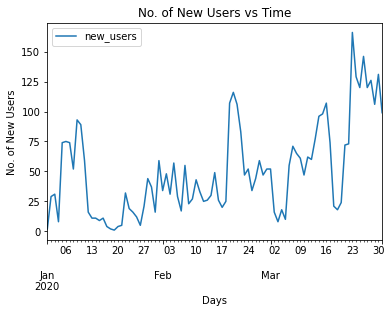

In [ ]:
df_new.plot(x='dates')
plt.title('No. of New Users vs Time')
plt.xlabel('Days')
plt.ylabel('No. of New Users')
plt.show()

**Existing Users by date**

In [ ]:
dict2 = {'dates': df2.index.tolist(), 'existing_users': existing_users}
df_existing = pd.DataFrame(dict2)
df_existing.dates = pd.to_datetime(df_existing.dates)


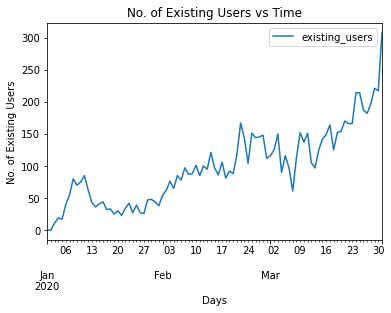

In [ ]:
df_existing.plot(x='dates')
plt.title('No. of Existing Users vs Time')
plt.xlabel('Days')
plt.ylabel('No. of Existing Users')
plt.show()

# **Q2. Proportion of New vs Existing Users**

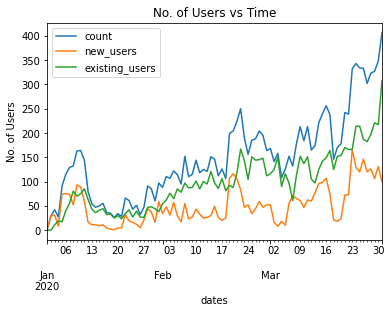

In [ ]:
ax = dh1.plot()
plt.title('No. of Users vs Time')
plt.xlabel('Days')
plt.ylabel('No. of Users')
df_new.plot(x='dates', ax=ax)
df_existing.plot(x='dates', ax=ax)
plt.show()

In [ ]:
df4 = df3.groupby('Ids').count()

In [ ]:
df4

,dates
Ids,
1.0,1
2.0,12
3.0,18
4.0,1
5.0,5
...,...
6307.0,3
6308.0,45
6309.0,2


In [ ]:
type(df4)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4594 entries, 1.0 to 6313.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dates   4594 non-null   int64
dtypes: int64(1)
memory usage: 71.8 KB


In [ ]:
# Total number of Users
Users = len(df4)

In [ ]:
# One Time Users
New_Users = (df4['dates'] == 1).sum()

In [ ]:
# Number of Frequent Users
Old_Users = Users - New_Users

In [ ]:
# Proportion of One-Time vs Frequent
Proportion_New = New_Users/Users
Proportion_Old = Old_Users/Users
print("One-Time Users :", Proportion_New)
print("Frequent Users :", Proportion_Old)

One-Time Users : 0.5629081410535481
Frequent Users : 0.4370918589464519


In [ ]:
# Convert dataframe to user_id, created_at, end_time
df3

,dates,Ids
0,2020-01-01,2154.0
1,2020-01-01,6286.0
407,2020-01-02,3539.0
408,2020-01-02,4522.0
409,2020-01-02,4511.0
...,...,...
37032,2020-03-31,1386.0
37033,2020-03-31,1643.0
37034,2020-03-31,1889.0
37035,2020-03-31,1782.0


In [ ]:
df6 = df3.sort_values(by='dates').drop_duplicates(subset='Ids', keep='first')

In [ ]:
df7 = df3.sort_values(by='dates').drop_duplicates(subset='Ids', keep='last')

In [ ]:
df6

,dates,Ids
0,2020-01-01,2154.0
1,2020-01-01,6286.0
435,2020-01-02,2759.0
434,2020-01-02,4534.0
433,2020-01-02,3977.0
...,...,...
36770,2020-03-31,1825.0
36767,2020-03-31,1823.0
36766,2020-03-31,1822.0
36765,2020-03-31,1821.0


In [ ]:
df6 = df6.set_index('Ids')
df6 = df6.sort_index(axis = 0)

In [ ]:
df7 = df7.set_index('Ids')
df7 = df7.sort_index(axis = 0)

In [ ]:
df6

,dates
Ids,
1.0,2020-03-17
2.0,2020-01-03
3.0,2020-02-08
4.0,2020-03-17
5.0,2020-03-15
...,...
6307.0,2020-01-21
6308.0,2020-02-01
6309.0,2020-03-02


In [ ]:
df7

,dates
Ids,
1.0,2020-03-17
2.0,2020-03-28
3.0,2020-03-31
4.0,2020-03-17
5.0,2020-03-20
...,...
6307.0,2020-01-23
6308.0,2020-03-31
6309.0,2020-03-19


In [ ]:
df11 = df6.assign(end_time=df7.dates)
df11 = df11.rename(columns={"dates": "created_at"})

In [ ]:
df11

,created_at,end_time
Ids,,
1.0,2020-03-17,2020-03-17
2.0,2020-01-03,2020-03-28
3.0,2020-02-08,2020-03-31
4.0,2020-03-17,2020-03-17
5.0,2020-03-15,2020-03-20
...,...,...
6307.0,2020-01-21,2020-01-23
6308.0,2020-02-01,2020-03-31
6309.0,2020-03-02,2020-03-19


In [ ]:
df4

,dates
Ids,
1.0,1
2.0,12
3.0,18
4.0,1
5.0,5
...,...
6307.0,3
6308.0,45
6309.0,2


In [ ]:
df13 = df3.copy()

In [ ]:
df13

,dates,Ids
0,2020-01-01,2154.0
1,2020-01-01,6286.0
407,2020-01-02,3539.0
408,2020-01-02,4522.0
409,2020-01-02,4511.0
...,...,...
37032,2020-03-31,1386.0
37033,2020-03-31,1643.0
37034,2020-03-31,1889.0
37035,2020-03-31,1782.0


In [ ]:
df13['dates'] = pd.to_datetime(df13['dates'], format='%d-%m-%Y')

In [ ]:
df13 = df13.sort_values(by=['dates'])
df13

,dates,Ids
0,2020-01-01,2154.0
1,2020-01-01,6286.0
435,2020-01-02,2759.0
434,2020-01-02,4534.0
433,2020-01-02,3977.0
...,...,...
36760,2020-03-31,680.0
36759,2020-03-31,76.0
36758,2020-03-31,75.0
36768,2020-03-31,1824.0


In [ ]:
df14 = df13.groupby(['Ids']).agg(lambda x: x.diff().abs().mean())

In [ ]:
df14

,dates
Ids,
1.0,NaT
2.0,7 days 17:27:16.363636363
3.0,3 days 01:24:42.352941176
4.0,NaT
5.0,1 days 06:00:00
...,...
6307.0,1 days 00:00:00
6308.0,1 days 08:10:54.545454545
6309.0,17 days 00:00:00


In [ ]:
df31 = df14.copy()

In [ ]:
df14 = df14['dates'].fillna(pd.Timedelta(seconds=0)).dt.seconds.to_frame()

In [ ]:
df14['dates'] = pd.to_numeric(pd.to_datetime(df14['dates']))

In [ ]:
df14

,dates
Ids,
1.0,0
2.0,62836
3.0,5082
4.0,0
5.0,21600
...,...
6307.0,0
6308.0,29454
6309.0,0


In [ ]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4594 entries, 1.0 to 6313.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dates   4594 non-null   int64
dtypes: int64(1)
memory usage: 71.8 KB


In [ ]:
import datetime

april1 = datetime.datetime(2020, 4, 1)

print(april1)

2020-04-01 00:00:00


In [ ]:
d12 = df4.assign(login_count=df4.dates, diff_first_last=df11.end_time - df11.created_at, time_from_last=april1 - df11.end_time, avg_gap=df14.dates).drop(columns=['dates'])

In [ ]:
d12['diff_first_last'] = d12['diff_first_last'].dt.days
d12['time_from_last'] = d12['time_from_last'].dt.days

# **Q5. X-factors used**

1.   Login Count
2.   Days from Last Login (days)
3.   Days between first and last login (days)
4.   Average Gap between logins (in sec)




In [ ]:
d12

,login_count,diff_first_last,time_from_last,avg_gap
Ids,,,,
1.0,1,0,15,0
2.0,12,85,4,62836
3.0,18,52,1,5082
4.0,1,0,15,0
5.0,5,5,12,21600
...,...,...,...,...
6307.0,3,2,69,0
6308.0,45,59,1,29454
6309.0,2,17,13,0


In [ ]:
cor = d12.corr(method='pearson')
cor

,login_count,diff_first_last,time_from_last,avg_gap
login_count,1.000000,0.752074,-0.183690,0.526067
diff_first_last,0.752074,1.000000,-0.206257,0.568121
time_from_last,-0.183690,-0.206257,1.000000,-0.151690
avg_gap,0.526067,0.568121,-0.151690,1.000000


**Standard Scalar**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(d12[['login_count', 'diff_first_last', 'time_from_last', 'avg_gap']])
df_scaled = scaler.transform(d12[['login_count',  'diff_first_last', 'time_from_last', 'avg_gap']])

In [ ]:
UserId = []
for col in df2:
  for ele in df2[col].unique() :
    if not np.isnan(ele) :
      UserId.append(ele)

In [ ]:
UserId = set(UserId)
print(len(UserId))
print(UserId)

4594
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158

**KMeans Clustering to 3 Clusters**

In [ ]:
kmeans = KMeans(n_clusters=3).fit(df_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.29878057 -0.35322044  1.26685258 -0.33470841]
 [-0.24008283 -0.284313   -0.58463327 -0.3023702 ]
 [ 1.5697047   1.8575937  -0.45567507  1.88774261]]


In [ ]:
labels = kmeans.labels_
df5 = pd.DataFrame([df4.index, labels]).T

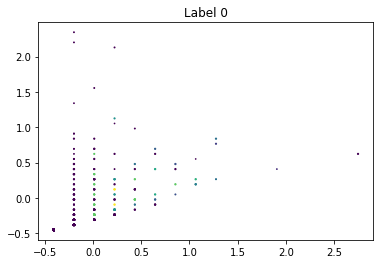

[[-0.40956705 -0.45368075  0.35671417 -0.44185272]
 [-0.40956705 -0.45368075  0.35671417 -0.44185272]
 [-0.40956705 -0.45368075  0.35671417 -0.44185272]
 ...
 [-0.40956705 -0.45368075  0.8138576  -0.44185272]
 [-0.40956705 -0.45368075  2.18528789 -0.44185272]
 [ 0.01169144 -0.31023895  1.53766803 -0.44185272]]


In [ ]:
filtered_label0 = df_scaled[labels == 0]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], filtered_label0[:,2], filtered_label0[:,3])
plt.title("Label 0")
plt.show()
print(filtered_label0)

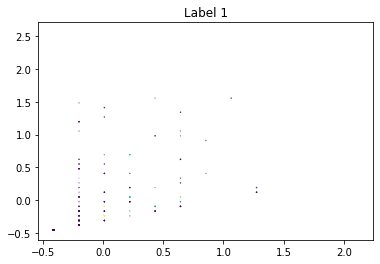

[[-0.40956705 -0.45368075 -0.5194774  -0.44185272]
 [-0.40956705 -0.45368075 -0.5194774  -0.44185272]
 [ 0.43294993 -0.09507625 -0.63376326  0.73785164]
 ...
 [ 0.22232068  0.40697005 -0.86233497 -0.44185272]
 [-0.19893781  0.76557456 -0.59566797 -0.44185272]
 [ 0.43294993  1.55450446 -0.97662083 -0.44185272]]


In [ ]:
filtered_label1 = df_scaled[labels == 1]
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1], filtered_label1[:,2], filtered_label1[:,3])
plt.title("Label 1")
plt.show()
print(filtered_label1)

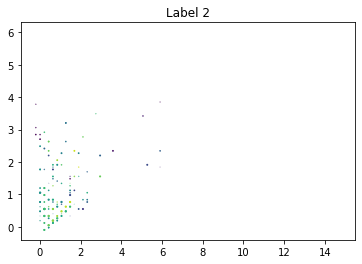

[[ 1.90735464  5.64259578 -0.93852554  2.98999464]
 [ 3.17113011  3.27580607 -1.0528114  -0.1642945 ]
 [ 3.38175935  3.49096877 -1.0528114  -0.1796962 ]
 ...
 [ 2.11798388  4.92538678 -1.0528114   0.73785164]
 [ 8.85811971  3.77785237 -1.0528114   1.16680525]
 [ 2.96050086  5.21227038 -1.0528114   3.98203863]]


In [ ]:
filtered_label2 = df_scaled[labels == 2]
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1], filtered_label2[:,2], filtered_label2[:,3])
plt.title("Label 2")
plt.show()
print(filtered_label2)

In [ ]:
df5.head()

,0,1
0,1.0,1.0
1,2.0,2.0
2,3.0,2.0
3,4.0,1.0
4,5.0,1.0


In [ ]:
print(df5.columns.tolist())

[0, 1]


In [ ]:
df5 = df5.rename(columns={0: "ID", 1: "Cluster"})

In [ ]:
y = df5.pop('Cluster')
X = df5

**Splitting to Train and Test Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

**Random Forest Classification** \
Using Gridsearch to tune n_estimators ie., number of trees

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40]
}

In [ ]:
random_forest_model = RandomForestClassifier()

clf_1 = GridSearchCV(estimator = random_forest_model , param_grid = param_grid)

clf_1.fit(X_train, y_train)

print("Random Forest Best n value : ", clf_1.best_params_)

Random Forest Best n value :  {'n_estimators': 10}


In [ ]:
clf1 = RandomForestClassifier(n_estimators= 10, criterion='gini')
clf1.fit(X_train, y_train)
y_pred_1 = clf1.predict(X_test)

**Metrics for RandomForest Classification**

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_1))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_1))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred_1))

Accuracy: 0.7921653971708379
Confusion Matrix: 
 [[237   2  16]
 [  1 460  61]
 [ 20  91  31]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       255
         1.0       0.83      0.88      0.86       522
         2.0       0.29      0.22      0.25       142

    accuracy                           0.79       919
   macro avg       0.68      0.68      0.68       919
weighted avg       0.77      0.79      0.78       919



**Elbow method for knn classification** 

In [ ]:
error_rate = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

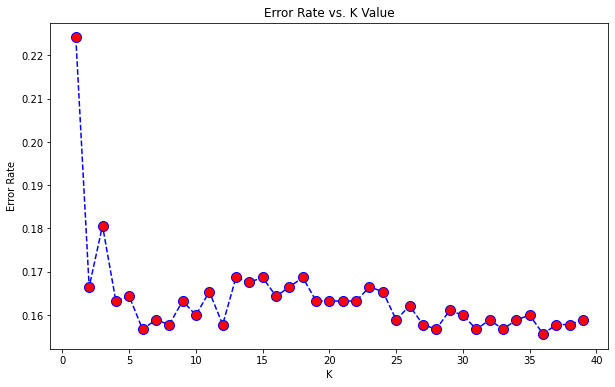

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
clf_2 = KNeighborsClassifier(n_neighbors=9)
clf_2.fit(X_train, y_train)

y_pred_2 = clf_2.predict(X_test)

**Metrics for knn**

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_2))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred_2))
print("Classification Report:", metrics.classification_report(y_test, y_pred_2))

Accuracy: 0.8367791077257889
Confusion Matrix: [[252   2   1]
 [  1 487  34]
 [ 20  92  30]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       255
         1.0       0.84      0.93      0.88       522
         2.0       0.46      0.21      0.29       142

    accuracy                           0.84       919
   macro avg       0.74      0.71      0.71       919
weighted avg       0.80      0.84      0.81       919



In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from sklearn_extra.cluster import KMedoids

#kmeds = KMedoids(n_clusters=2).fit(df_scaled)
#centroid2s = kmeds.cluster_centers_
#print(centroid2s)

**Clustering using Birch to 2 Clusters**

In [ ]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=2)
brc.fit(df_scaled)
labels_2 = brc.predict(df_scaled)

In [ ]:
labels_2

array([1, 0, 0, ..., 1, 0, 1])

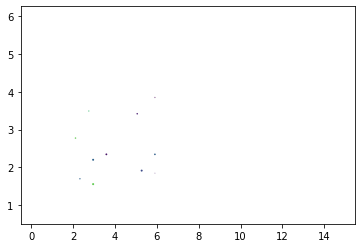

<Figure size 720x720 with 0 Axes>

[[ 1.90735464e+00  5.64259578e+00 -9.38525544e-01  2.98999464e+00]
 [ 3.17113011e+00  3.27580607e+00 -1.05281140e+00 -1.64294504e-01]
 [ 3.38175935e+00  3.49096877e+00 -1.05281140e+00 -1.79696200e-01]
 [ 4.85616406e+00  3.41924787e+00 -1.01471612e+00  3.13158066e-01]
 [ 6.54119802e+00  3.84957327e+00 -8.62334973e-01  3.41894826e+00]
 [ 2.32861313e+00  1.76966716e+00 -1.05281140e+00  1.37303505e+00]
 [ 6.54119802e+00  3.77785237e+00 -1.05281140e+00  3.27596372e+00]
 [ 3.80301784e+00  9.80737258e-01 -9.76620830e-01 -4.41852724e-01]
 [ 4.22427633e+00  2.41515526e+00 -1.05281140e+00  3.41894826e+00]
 [ 1.90735464e+00  4.42334048e+00 -1.05281140e+00  4.16109118e-01]
 [ 1.06483766e+00  4.99710768e+00 -7.09953830e-01  3.60284014e+00]
 [ 1.27546690e+00  4.99710768e+00 -7.86144401e-01  1.91755600e+00]
 [ 8.85811971e+00  3.20408517e+00 -9.00430259e-01  3.08843407e-01]
 [ 3.17113011e+00  8.37295457e-01 -1.05281140e+00 -1.64294504e-01]
 [ 3.38175935e+00  1.12417906e+00 -1.01471612e+00  6.06773373e

In [ ]:
filtered_label0 = df_scaled[labels_2 == 0]
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], filtered_label0[:,2], filtered_label0[:,3])
plt.title("Label 0")
plt.show()
print(filtered_label0)

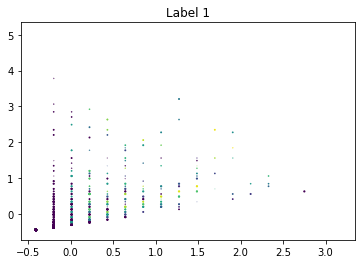

[[-0.40956705 -0.45368075 -0.5194774  -0.44185272]
 [-0.40956705 -0.45368075 -0.5194774  -0.44185272]
 [ 0.43294993 -0.09507625 -0.63376326  0.73785164]
 ...
 [ 0.01169144 -0.31023895  1.53766803 -0.44185272]
 [-0.19893781  0.76557456 -0.59566797 -0.44185272]
 [ 0.43294993  1.55450446 -0.97662083 -0.44185272]]


In [ ]:
filtered_label1 = df_scaled[labels_2 == 1]
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1], filtered_label1[:,2], filtered_label1[:,3])
plt.title("Label 1")
plt.show()
print(filtered_label1)

In [ ]:
df20 = pd.DataFrame([df4.index, labels_2]).T

In [ ]:
df20 = df20.rename(columns={0: "ID", 1: "Cluster"})

In [ ]:
df20

,ID,Cluster
0,1.0,1.0
1,2.0,0.0
2,3.0,0.0
3,4.0,1.0
4,5.0,1.0
...,...,...
4589,6307.0,1.0
4590,6308.0,0.0
4591,6309.0,1.0
4592,6312.0,0.0


In [ ]:
y2 = df20.pop('Cluster')
X2 = df20

In [ ]:
df20

,ID
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
...,...
4589,6307.0
4590,6308.0
4591,6309.0
4592,6312.0


**Splitting to Train and Test**

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size=0.2)

**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
clf3.fit(X2_train, y2_train)

LogisticRegression()

In [ ]:
y_pred_3 = clf3.predict(X_test)

**Metrics for Logistic Regression**

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_3))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred_3))
print("Classification Report:", metrics.classification_report(y_test, y_pred_3))

Accuracy: 0.5680087051142546
Confusion Matrix: [[  0 255   0]
 [  0 522   0]
 [  0 142   0]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       255
         1.0       0.57      1.00      0.72       522
         2.0       0.00      0.00      0.00       142

    accuracy                           0.57       919
   macro avg       0.19      0.33      0.24       919
weighted avg       0.32      0.57      0.41       919



# **Question 3**

**We should use Weekly Retention becuase its an entertainment platform and people generally tune in weekly.**

In [ ]:
!pip install calculate-retention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from calculate_retention import CalculateRetention
from datetime import date, timedelta
import datetime as dt

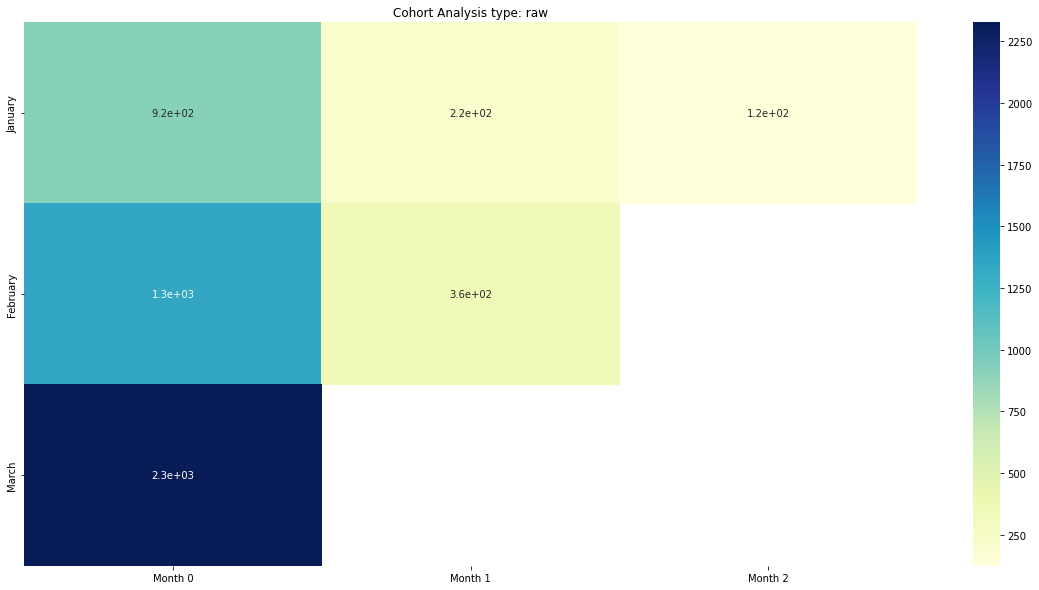

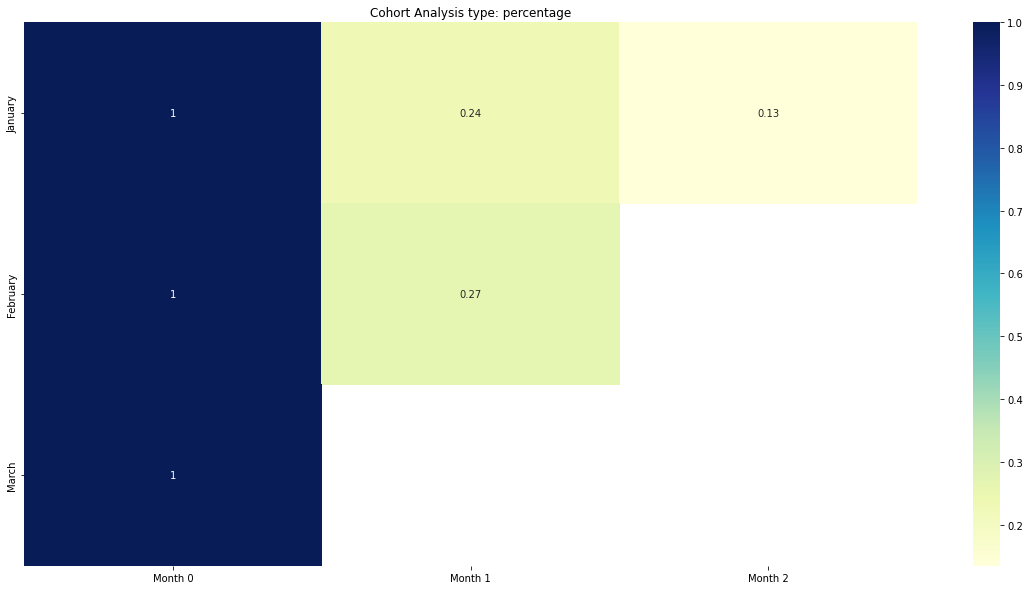

In [ ]:
ret_monthly = CalculateRetention(df11, 'monthly')
ret_monthly.plot_retention('raw')
ret_monthly.plot_retention('percentage')

In [ ]:
df13

,dates,Ids
0,2020-01-01,2154.0
1,2020-01-01,6286.0
435,2020-01-02,2759.0
434,2020-01-02,4534.0
433,2020-01-02,3977.0
...,...,...
36760,2020-03-31,680.0
36759,2020-03-31,76.0
36758,2020-03-31,75.0
36768,2020-03-31,1824.0


In [ ]:
df16 = df9.copy()

In [ ]:
df16

Occurence                                                         \
dates  2020-01-01 2020-01-02 2020-01-03 2020-01-04 2020-01-05 2020-01-06   
Ids                                                                        
1.0           NaN        NaN        NaN        NaN        NaN        NaN   
2.0           NaN        NaN        New   Existing        NaN        NaN   
3.0           NaN        NaN        NaN        NaN        NaN        NaN   
4.0           NaN        NaN        NaN        NaN        NaN        NaN   
5.0           NaN        NaN        NaN        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
6307.0        NaN        NaN        NaN        NaN        NaN        NaN   
6308.0        NaN        NaN        NaN        NaN        NaN        NaN   
6309.0        NaN        NaN        NaN        NaN        NaN        NaN   
6312.0        NaN        NaN        NaN        NaN        NaN        NaN   
6313.0        NaN        NaN        NaN        NaN        NaN        NaN   

                                                    ...                        \
dates  2020-01-07 2020-01-08 2020-01-09 2020-01-10  ... 2020-03-22 2020-03-23   
Ids                                                 ...                         
1.0           NaN        NaN        NaN        NaN  ...        NaN        NaN   
2.0           NaN   Existing   Existing        NaN  ...        NaN        NaN   
3.0           NaN        NaN        NaN        NaN  ...        NaN        NaN   
4.0           NaN        NaN        NaN        NaN  ...        NaN        NaN   
5.0           NaN        NaN        NaN        NaN  ...        NaN        NaN   
...           ...        ...        ...        ...  ...        ...        ...   
6307.0        NaN        NaN        NaN        NaN  ...        NaN        NaN   
6308.0        NaN        NaN        NaN        NaN  ...        NaN        NaN   
6309.0        NaN        NaN        NaN        NaN  ...        NaN        NaN   
6312.0        NaN        NaN        NaN        NaN  ...        NaN   Existing   
6313.0        NaN        NaN        NaN        NaN  ...        NaN        NaN   

                                                                          \
dates  2020-03-24 2020-03-25 2020-03-26 2020-03-27 2020-03-28 2020-03-29   
Ids                                                                        
1.0           NaN        NaN        NaN        NaN        NaN        NaN   
2.0           NaN        NaN   Existing        NaN   Existing        NaN   
3.0      Existing        NaN   Existing        NaN        NaN        NaN   
4.0           NaN        NaN        NaN        NaN        NaN        NaN   
5.0           NaN        NaN        NaN        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...        ...   
6307.0        NaN        NaN        NaN        NaN        NaN        NaN   
6308.0        NaN   Existing   Existing   Existing        NaN   Existing   
6309.0        NaN        NaN        NaN        NaN        NaN        NaN   
6312.0   Existing   Existing   Existing        NaN        NaN        NaN   
6313.0   Existing        NaN        NaN        NaN        NaN   Existing   

                              
dates  2020-03-30 2020-03-31  
Ids                           
1.0           NaN        NaN  
2.0           NaN        NaN  
3.0      Existing   Existing  
4.0           NaN        NaN  
5.0           NaN        NaN  
...           ...        ...  
6307.0        NaN        NaN  
6308.0   Existing   Existing  
6309.0        NaN        NaN  
6312.0        NaN   Existing  
6313.0        NaN        NaN  

[4594 rows x 91 columns]

In [ ]:
df16 = df16.notnull().astype("int")

In [ ]:
df16

Occurence                                                         \
dates  2020-01-01 2020-01-02 2020-01-03 2020-01-04 2020-01-05 2020-01-06   
Ids                                                                        
1.0             0          0          0          0          0          0   
2.0             0          0          1          1          0          0   
3.0             0          0          0          0          0          0   
4.0             0          0          0          0          0          0   
5.0             0          0          0          0          0          0   
...           ...        ...        ...        ...        ...        ...   
6307.0          0          0          0          0          0          0   
6308.0          0          0          0          0          0          0   
6309.0          0          0          0          0          0          0   
6312.0          0          0          0          0          0          0   
6313.0          0          0          0          0          0          0   

                                                    ...                        \
dates  2020-01-07 2020-01-08 2020-01-09 2020-01-10  ... 2020-03-22 2020-03-23   
Ids                                                 ...                         
1.0             0          0          0          0  ...          0          0   
2.0             0          1          1          0  ...          0          0   
3.0             0          0          0          0  ...          0          0   
4.0             0          0          0          0  ...          0          0   
5.0             0          0          0          0  ...          0          0   
...           ...        ...        ...        ...  ...        ...        ...   
6307.0          0          0          0          0  ...          0          0   
6308.0          0          0          0          0  ...          0          0   
6309.0          0          0          0          0  ...          0          0   
6312.0          0          0          0          0  ...          0          1   
6313.0          0          0          0          0  ...          0          0   

                                                                          \
dates  2020-03-24 2020-03-25 2020-03-26 2020-03-27 2020-03-28 2020-03-29   
Ids                                                                        
1.0             0          0          0          0          0          0   
2.0             0          0          1          0          1          0   
3.0             1          0          1          0          0          0   
4.0             0          0          0          0          0          0   
5.0             0          0          0          0          0          0   
...           ...        ...        ...        ...        ...        ...   
6307.0          0          0          0          0          0          0   
6308.0          0          1          1          1          0          1   
6309.0          0          0          0          0          0          0   
6312.0          1          1          1          0          0          0   
6313.0          1          0          0          0          0          1   

                              
dates  2020-03-30 2020-03-31  
Ids                           
1.0             0          0  
2.0             0          0  
3.0             1          1  
4.0             0          0  
5.0             0          0  
...           ...        ...  
6307.0          0          0  
6308.0          1          1  
6309.0          0          0  
6312.0          0          1  
6313.0          0          0  

[4594 rows x 91 columns]

In [ ]:
df17 = df13.copy()

In [ ]:
df17

,dates,Ids
0,2020-01-01,2154.0
1,2020-01-01,6286.0
435,2020-01-02,2759.0
434,2020-01-02,4534.0
433,2020-01-02,3977.0
...,...,...
36760,2020-03-31,680.0
36759,2020-03-31,76.0
36758,2020-03-31,75.0
36768,2020-03-31,1824.0


In [ ]:
df17 = df17.set_index('Ids')
df17 = df17.sort_index(axis = 0)

In [ ]:
df11

,created_at,end_time
Ids,,
1.0,2020-03-17,2020-03-17
2.0,2020-01-03,2020-03-28
3.0,2020-02-08,2020-03-31
4.0,2020-03-17,2020-03-17
5.0,2020-03-15,2020-03-20
...,...,...
6307.0,2020-01-21,2020-01-23
6308.0,2020-02-01,2020-03-31
6309.0,2020-03-02,2020-03-19


In [ ]:
df18 = df17.assign(start_date=df11.created_at, end_date=df11.end_time)

In [ ]:
df18

,dates,start_date,end_date
Ids,,,
1.0,2020-03-17,2020-03-17,2020-03-17
2.0,2020-03-11,2020-01-03,2020-03-28
2.0,2020-03-14,2020-01-03,2020-03-28
2.0,2020-01-04,2020-01-03,2020-03-28
2.0,2020-01-11,2020-01-03,2020-03-28
...,...,...,...
6313.0,2020-03-04,2020-03-01,2020-03-29
6313.0,2020-03-01,2020-03-01,2020-03-29
6313.0,2020-03-16,2020-03-01,2020-03-29


In [ ]:
df18 = df18.sort_values(['Ids', 'dates'])
df18

,dates,start_date,end_date
Ids,,,
1.0,2020-03-17,2020-03-17,2020-03-17
2.0,2020-01-03,2020-01-03,2020-03-28
2.0,2020-01-04,2020-01-03,2020-03-28
2.0,2020-01-08,2020-01-03,2020-03-28
2.0,2020-01-09,2020-01-03,2020-03-28
...,...,...,...
6313.0,2020-03-01,2020-03-01,2020-03-29
6313.0,2020-03-04,2020-03-01,2020-03-29
6313.0,2020-03-16,2020-03-01,2020-03-29


In [ ]:
df18.head(20)

,dates,start_date,end_date
Ids,,,
1.0,2020-03-17,2020-03-17,2020-03-17
2.0,2020-01-03,2020-01-03,2020-03-28
2.0,2020-01-04,2020-01-03,2020-03-28
2.0,2020-01-08,2020-01-03,2020-03-28
2.0,2020-01-09,2020-01-03,2020-03-28
2.0,2020-01-11,2020-01-03,2020-03-28
2.0,2020-03-11,2020-01-03,2020-03-28
2.0,2020-03-12,2020-01-03,2020-03-28
2.0,2020-03-14,2020-01-03,2020-03-28


In [ ]:
df18['days_since_start'] = (df18['dates'] - df18['start_date']).dt.days
df18.head()

,dates,start_date,end_date,days_since_start
Ids,,,,
1.0,2020-03-17,2020-03-17,2020-03-17,0
2.0,2020-01-03,2020-01-03,2020-03-28,0
2.0,2020-01-04,2020-01-03,2020-03-28,1
2.0,2020-01-08,2020-01-03,2020-03-28,5
2.0,2020-01-09,2020-01-03,2020-03-28,6


In [ ]:
df18['start_week'] = df18.apply(lambda x: (x['start_date'] - pd.Timedelta(x['start_date'].dayofweek, u='day')).date(), axis=1)
df18['start_week'] = pd.to_datetime(df18['start_week'])
df18['weeks_since_start'] = np.floor((df18['dates'] - df18['start_week']) / np.timedelta64(1, 'W'))

In [ ]:
df18

,dates,start_date,end_date,days_since_start,start_week,weeks_since_start
Ids,,,,,,
1.0,2020-03-17,2020-03-17,2020-03-17,0,2020-03-16,0.0
2.0,2020-01-03,2020-01-03,2020-03-28,0,2020-01-02,0.0
2.0,2020-01-04,2020-01-03,2020-03-28,1,2020-01-02,0.0
2.0,2020-01-08,2020-01-03,2020-03-28,5,2020-01-02,0.0
2.0,2020-01-09,2020-01-03,2020-03-28,6,2020-01-02,1.0
...,...,...,...,...,...,...
6313.0,2020-03-01,2020-03-01,2020-03-29,0,2020-02-29,0.0
6313.0,2020-03-04,2020-03-01,2020-03-29,3,2020-02-29,0.0
6313.0,2020-03-16,2020-03-01,2020-03-29,15,2020-02-29,2.0


In [ ]:
df18['start_month'] = df18['start_date'].values.astype('datetime64[M]')
df18['months_since_start'] = np.floor((df18['dates'] - df18['start_month']) / np.timedelta64(1, 'M'))

In [ ]:
df18 = df18.reset_index()

# **Q4. Day-on-Day Data for Retention for Each User**

In [ ]:
df18

,Ids,dates,start_date,end_date,days_since_start,start_week,weeks_since_start,start_month,months_since_start
0,1.0,2020-03-17,2020-03-17,2020-03-17,0,2020-03-16,0.0,2020-03-01,0.0
1,2.0,2020-01-03,2020-01-03,2020-03-28,0,2020-01-02,0.0,2020-01-01,0.0
2,2.0,2020-01-04,2020-01-03,2020-03-28,1,2020-01-02,0.0,2020-01-01,0.0
3,2.0,2020-01-08,2020-01-03,2020-03-28,5,2020-01-02,0.0,2020-01-01,0.0
4,2.0,2020-01-09,2020-01-03,2020-03-28,6,2020-01-02,1.0,2020-01-01,0.0
...,...,...,...,...,...,...,...,...,...
13522,6313.0,2020-03-01,2020-03-01,2020-03-29,0,2020-02-29,0.0,2020-03-01,0.0
13523,6313.0,2020-03-04,2020-03-01,2020-03-29,3,2020-02-29,0.0,2020-03-01,0.0
13524,6313.0,2020-03-16,2020-03-01,2020-03-29,15,2020-02-29,2.0,2020-03-01,0.0
13525,6313.0,2020-03-24,2020-03-01,2020-03-29,23,2020-02-29,3.0,2020-03-01,0.0


In [ ]:
df27 = df18.copy()

In [ ]:
df25 = df18.groupby('days_since_start')['Ids'].nunique()

**Daily Retention Data for each User**

In [ ]:
df25

days_since_start
0     4594
1     1148
2      754
3      587
4      470
      ... 
85       7
86       6
87       3
89       1
90       1
Name: Ids, Length: 90, dtype: int64

**Daily Retention Graph**

(0.0, 1.05)

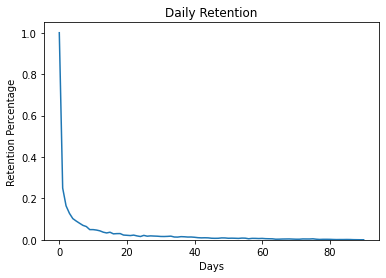

In [ ]:
daily_retention = df18.groupby('days_since_start')['Ids'].nunique() / df18['Ids'].nunique()

plt.plot(daily_retention)
plt.title('Daily Retention')
plt.xlabel('Days')
plt.ylabel('Retention Percentage')
plt.ylim(0,1.05)


In [ ]:
df18['Ids'].nunique()

4594

In [ ]:
daily_retention

days_since_start
0     1.000000
1     0.249891
2     0.164127
3     0.127775
4     0.102307
        ...   
85    0.001524
86    0.001306
87    0.000653
89    0.000218
90    0.000218
Name: Ids, Length: 90, dtype: float64

**Weekly Retention Graph**

(0.0, 1.05)

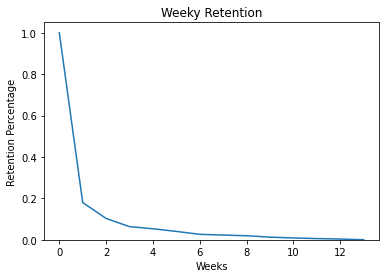

In [ ]:
weekly_retention = df18.groupby('weeks_since_start')['Ids'].nunique() / df18['Ids'].nunique()

plt.title('Weeky Retention')
plt.xlabel('Weeks')
plt.ylabel('Retention Percentage')
plt.plot(weekly_retention)
plt.ylim(0,1.05)

In [ ]:
weekly_retention

weeks_since_start
0.0     1.000000
1.0     0.180017
2.0     0.102960
3.0     0.063561
4.0     0.053330
5.0     0.040488
6.0     0.026339
7.0     0.022856
8.0     0.019591
9.0     0.012843
10.0    0.008925
11.0    0.005877
12.0    0.003700
13.0    0.000218
Name: Ids, dtype: float64

**Monthly Retention Graph**

(0.0, 1.05)

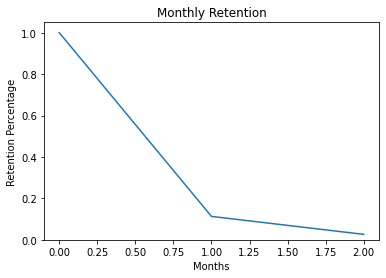

In [ ]:
monthly_retention = df18.groupby('months_since_start')['Ids'].nunique() / df18['Ids'].nunique()
plt.title('Monthly Retention')
plt.xlabel('Months')
plt.ylabel('Retention Percentage')
plt.plot(monthly_retention)
plt.ylim(0,1.05)

In [ ]:
monthly_retention

months_since_start
0.0    1.000000
1.0    0.112973
2.0    0.026339
Name: Ids, dtype: float64

In [ ]:
df27

,Ids,dates,start_date,end_date,days_since_start,start_week,weeks_since_start,start_month,months_since_start
0,1.0,2020-03-17,2020-03-17,2020-03-17,0,2020-03-16,0.0,2020-03-01,0.0
1,2.0,2020-01-03,2020-01-03,2020-03-28,0,2020-01-02,0.0,2020-01-01,0.0
2,2.0,2020-01-04,2020-01-03,2020-03-28,1,2020-01-02,0.0,2020-01-01,0.0
3,2.0,2020-01-08,2020-01-03,2020-03-28,5,2020-01-02,0.0,2020-01-01,0.0
4,2.0,2020-01-09,2020-01-03,2020-03-28,6,2020-01-02,1.0,2020-01-01,0.0
...,...,...,...,...,...,...,...,...,...
13522,6313.0,2020-03-01,2020-03-01,2020-03-29,0,2020-02-29,0.0,2020-03-01,0.0
13523,6313.0,2020-03-04,2020-03-01,2020-03-29,3,2020-02-29,0.0,2020-03-01,0.0
13524,6313.0,2020-03-16,2020-03-01,2020-03-29,15,2020-02-29,2.0,2020-03-01,0.0
13525,6313.0,2020-03-24,2020-03-01,2020-03-29,23,2020-02-29,3.0,2020-03-01,0.0


In [ ]:
df28 = df27.groupby('Ids')['days_since_start'].agg(lambda x: x.diff().abs().mean()).to_frame()

**Daily Retention (Average Daily Gap) for each user**

In [ ]:
df41 = df28.fillna(0)

In [ ]:
df41

,days_since_start
Ids,
1.0,0.000000
2.0,7.727273
3.0,3.058824
4.0,0.000000
5.0,1.250000
...,...
6307.0,1.000000
6308.0,1.340909
6309.0,17.000000


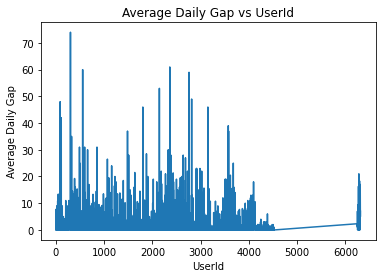

In [ ]:
plt.plot(df41)
plt.title('Average Daily Gap vs UserId')
plt.xlabel('UserId')
plt.ylabel('Average Daily Gap')
plt.show()

In [ ]:
df29 = df27.groupby('Ids')['weeks_since_start'].agg(lambda x: x.diff().abs().mean()).to_frame()

**Weekly Retention (Average Weekly Gap) for each User**

In [ ]:
df42 = df29.fillna(0)

In [ ]:
df42

,weeks_since_start
Ids,
1.0,0.000000
2.0,1.090909
3.0,0.411765
4.0,0.000000
5.0,0.000000
...,...
6307.0,0.000000
6308.0,0.181818
6309.0,2.000000


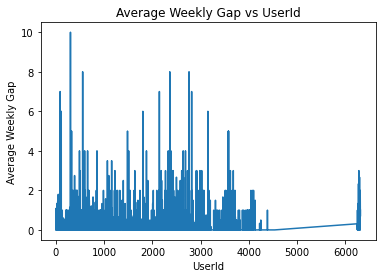

In [ ]:
plt.plot(df42)
plt.title('Average Weekly Gap vs UserId')
plt.xlabel('UserId')
plt.ylabel('Average Weekly Gap')
plt.show()

**Montly Retention (Average Monthly Gap) for Each User**

In [ ]:
df30 = df27.groupby('Ids')['months_since_start'].agg(lambda x: x.diff().abs().mean()).to_frame()

In [ ]:
df43 = df30.fillna(0)

In [ ]:
df43

,months_since_start
Ids,
1.0,0.000000
2.0,0.181818
3.0,0.058824
4.0,0.000000
5.0,0.000000
...,...
6307.0,0.000000
6308.0,0.022727
6309.0,0.000000


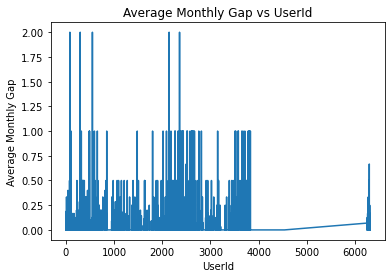

In [ ]:
plt.plot(df43)
plt.title('Average Monthly Gap vs UserId')
plt.xlabel('UserId')
plt.ylabel('Average Monthly Gap')
plt.show()

In [ ]:
df31

,dates
Ids,
1.0,NaT
2.0,7 days 17:27:16.363636363
3.0,3 days 01:24:42.352941176
4.0,NaT
5.0,1 days 06:00:00
...,...
6307.0,1 days 00:00:00
6308.0,1 days 08:10:54.545454545
6309.0,17 days 00:00:00


In [ ]:
df31.fillna(pd.Timedelta(seconds=0))

,dates
Ids,
1.0,0 days 00:00:00
2.0,7 days 17:27:16.363636363
3.0,3 days 01:24:42.352941176
4.0,0 days 00:00:00
5.0,1 days 06:00:00
...,...
6307.0,1 days 00:00:00
6308.0,1 days 08:10:54.545454545
6309.0,17 days 00:00:00


In [ ]:
df27.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527 entries, 0 to 13526
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ids                 13527 non-null  float64       
 1   dates               13527 non-null  datetime64[ns]
 2   start_date          13527 non-null  datetime64[ns]
 3   end_date            13527 non-null  datetime64[ns]
 4   days_since_start    13527 non-null  int64         
 5   start_week          13527 non-null  datetime64[ns]
 6   weeks_since_start   13527 non-null  float64       
 7   start_month         13527 non-null  datetime64[ns]
 8   months_since_start  13527 non-null  float64       
dtypes: datetime64[ns](5), float64(3), int64(1)
memory usage: 951.2 KB


In [ ]:
Ul = len(df27.index)
Uu = len(df27['Ids'].unique())

In [ ]:
d12

,login_count,diff_first_last,time_from_last,avg_gap
Ids,,,,
1.0,1,0,15,0
2.0,12,85,4,62836
3.0,18,52,1,5082
4.0,1,0,15,0
5.0,5,5,12,21600
...,...,...,...,...
6307.0,3,2,69,0
6308.0,45,59,1,29454
6309.0,2,17,13,0


In [ ]:
avg_lifespan = d12['diff_first_last'].mean()

**Customer Lifetime Value (CLV) = (Total number of User Logins/Number of Unique Users) X Average Life Span of Users**

Total Number of User Logins = 13527 \
Number of Unique Users = 4594

In [ ]:
clv = (Ul/Uu) * avg_lifespan

In [ ]:
print("Customer Lifetime Value : ", clv)

Customer Lifetime Value :  18.625807848021186


**Loyal Customer Rate = Repeated Users/Total Users**

In [ ]:
LCR = Proportion_Old

In [ ]:
print("Loyal Customer Rate : ", LCR)

Loyal Customer Rate :  0.4370918589464519
